In [ ]:
!kaggle datasets download -d waqi786/heart-attack-dataset

Dataset URL: https://www.kaggle.com/datasets/waqi786/heart-attack-dataset
License(s): apache-2.0
  0% 0.00/9.05k [00:00<?, ?B/s]
100% 9.05k/9.05k [00:00<00:00, 15.9MB/s]


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/heart-attack-dataset.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/heart_attack_dataset.csv')
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment
0,Male,70,181,262,No,Never,Typical Angina,Lifestyle Changes
1,Female,55,103,253,Yes,Never,Atypical Angina,Angioplasty
2,Male,42,95,295,Yes,Current,Typical Angina,Angioplasty
3,Male,84,106,270,No,Never,Atypical Angina,Coronary Artery Bypass Graft (CABG)
4,Male,86,187,296,Yes,Current,Non-anginal Pain,Medication


DATA CLEANING

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Blood Pressure (mmHg),0
Cholesterol (mg/dL),0
Has Diabetes,0
Smoking Status,0
Chest Pain Type,0
Treatment,0


hence there are no missing values.

DATA PREPROCESSING

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


DATA VISUALIZATION

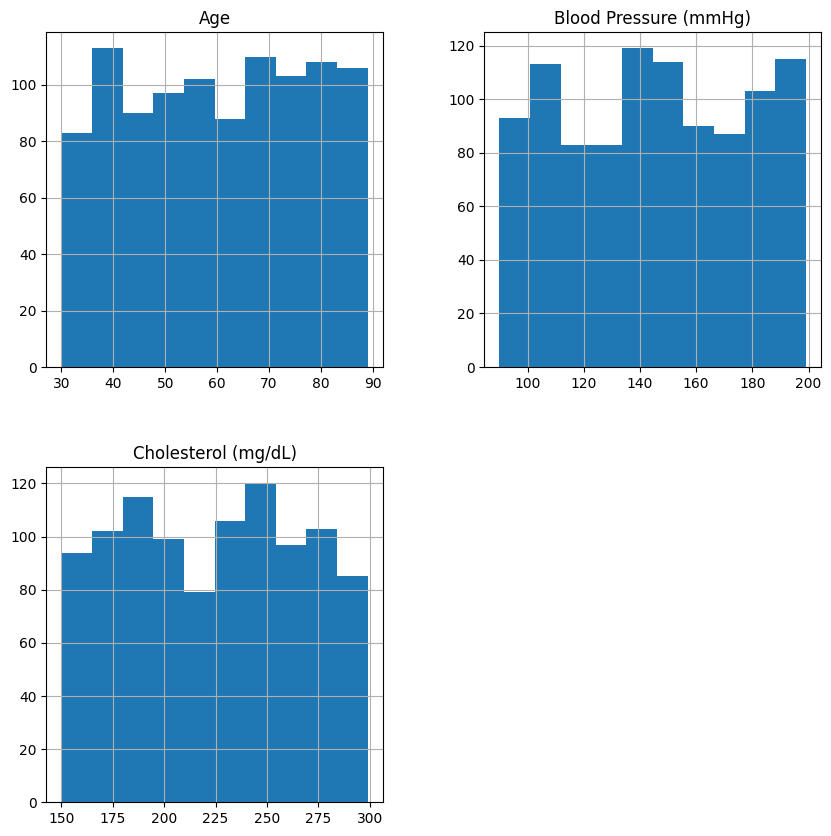

In [ ]:
df.hist(figsize=(10,10))
plt.show()

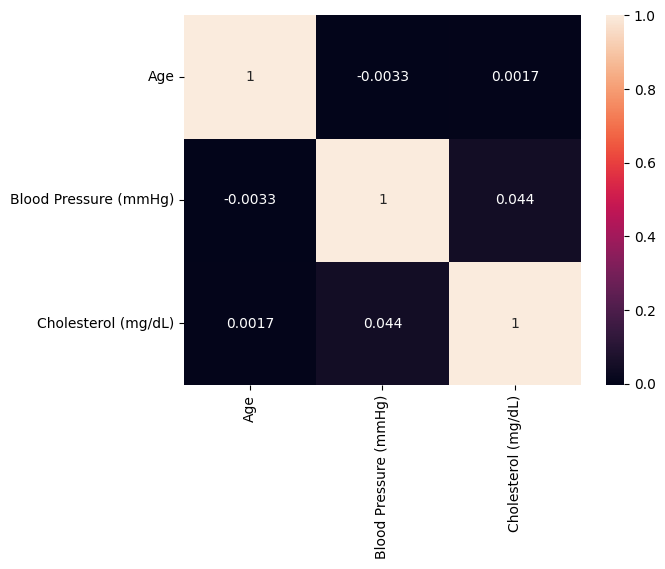

In [ ]:
numerical_df = df.select_dtypes(include=['float', 'int'])
sns.heatmap(numerical_df.corr(), annot=True)
plt.show()

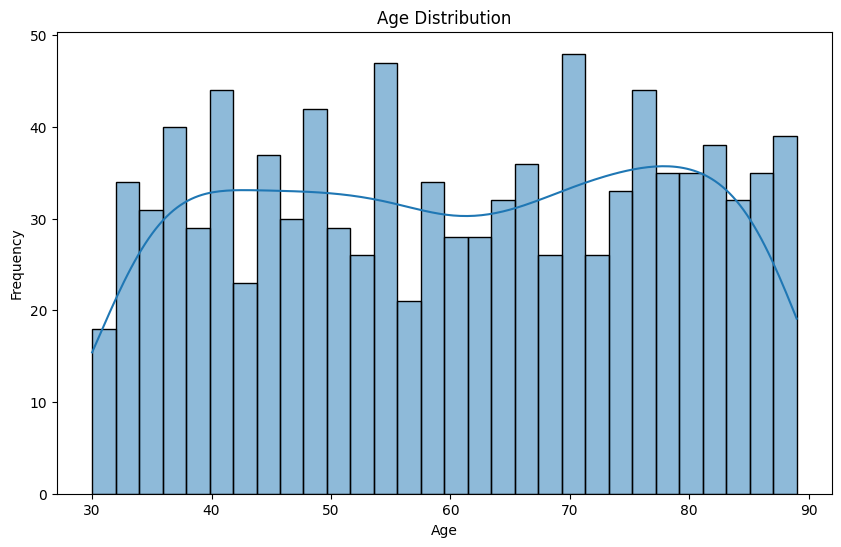

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'],kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

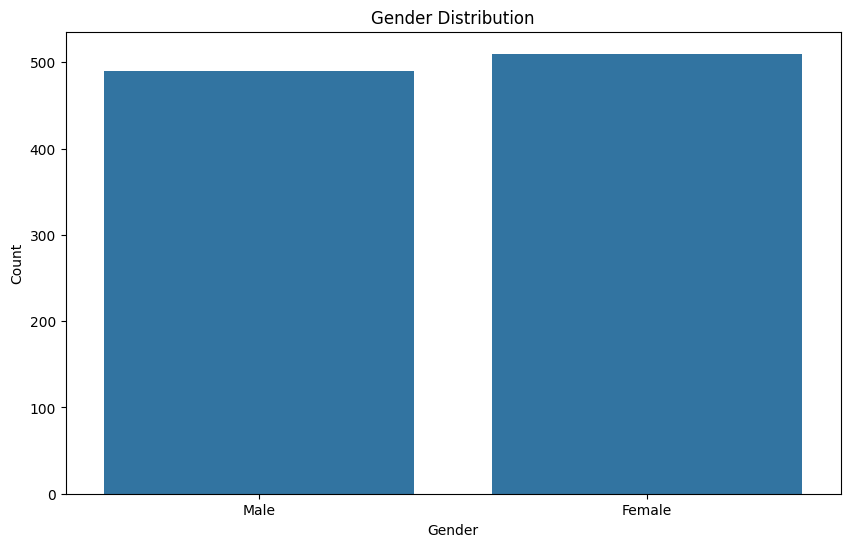

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


FEATURE ENGINEERING


In [ ]:

# Create a new feature for age group
df['Age_Group'] = np.where(df['Age'] <= 30, 'Young',
                          np.where((df['Age'] > 30) & (df['Age'] <= 50), 'Middle-Aged',
                                   np.where((df['Age'] > 50) & (df['Age'] <= 100), 'Senior', 'Unknown')))
# Create a new feature for cholesterol risk
df['Cholesterol_Risk'] = np.where(df['Cholesterol (mg/dL)'] > 200, 'High', 'Normal')

# Create a new feature for blood pressure risk
df['BloodPressure_Risk'] = np.where((df['Blood Pressure (mmHg)'] > 140) | (df['Blood Pressure (mmHg)'] > 90), 'High', 'Normal')

# Display the updated dataframe
df.head()


,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Age_Group,Cholesterol_Risk,BloodPressure_Risk
0,1,70,181,262,0,2,3,2,Senior,High,High
1,0,55,103,253,1,2,1,0,Senior,High,High
2,1,42,95,295,1,0,3,0,Middle-Aged,High,High
3,1,84,106,270,0,2,1,1,Senior,High,High
4,1,86,187,296,1,0,2,3,Senior,High,High


Here np.where is a function from the NumPy library that's used to create conditional statements.

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Blood Pressure (mmHg),0
Cholesterol (mg/dL),0
Has Diabetes,0
Smoking Status,0
Chest Pain Type,0
Treatment,0
Age_Group,0
Cholesterol_Risk,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

LABEL ENCODER-To convert categorical data into numerical data

In [ ]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,Gender,Age,Blood Pressure (mmHg),Cholesterol (mg/dL),Has Diabetes,Smoking Status,Chest Pain Type,Treatment,Age_Group,Cholesterol_Risk,BloodPressure_Risk
0,1,70,181,262,0,2,3,2,1,0,0
1,0,55,103,253,1,2,1,0,1,0,0
2,1,42,95,295,1,0,3,0,0,0,0
3,1,84,106,270,0,2,1,1,1,0,0
4,1,86,187,296,1,0,2,3,1,0,0


            MODELS
RANDOM FOREST,LOGISTIC REGRESSION ,DECISION TREE

In [ ]:


# Split the data into features (X) and target variable (y)
X = df.drop('Treatment', axis=1)
y = df['Treatment']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print( "Accuracy: {:.2f}%".format(accuracy*100))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 28.00%
Confusion Matrix:
[[19  8 12  9]
 [21  9 11  6]
 [10 16 16 10]
 [10 18 13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.40      0.35        48
           1       0.18      0.19      0.18        47
           2       0.31      0.31      0.31        52
           3       0.32      0.23      0.27        53

    accuracy                           0.28       200
   macro avg       0.28      0.28      0.28       200
weighted avg       0.28      0.28      0.28       200



In [ ]:
# prompt: here what is predicted in the above models

# ... (Previous code) ...

# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42)
logreg_classifier.fit(X_train, y_train)
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate Decision Tree
print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


In [ ]:

models={
    'Random Forest':RandomForestClassifier(),
    'Logistic Regression':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier()
}

for name,model in models.items():
  model.fit(X_train,y_train)
  print(name+ " trained")
  Y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test,y_pred)
  print(name+ "accuracy: {:.2f}%".format(accuracy*100))
  print(name+ "confusion matrix:\n",confusion_matrix(y_test,y_pred))
  print(name+ "classification report:\n",classification_report(y_test,y_pred))

Random Forest trained
Random Forestaccuracy: 28.00%
Random Forestconfusion matrix:
 [[19  8 12  9]
 [21  9 11  6]
 [10 16 16 10]
 [10 18 13 12]]
Random Forestclassification report:
               precision    recall  f1-score   support

           0       0.32      0.40      0.35        48
           1       0.18      0.19      0.18        47
           2       0.31      0.31      0.31        52
           3       0.32      0.23      0.27        53

    accuracy                           0.28       200
   macro avg       0.28      0.28      0.28       200
weighted avg       0.28      0.28      0.28       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression trained
Logistic Regressionaccuracy: 28.00%
Logistic Regressionconfusion matrix:
 [[19  8 12  9]
 [21  9 11  6]
 [10 16 16 10]
 [10 18 13 12]]
Logistic Regressionclassification report:
               precision    recall  f1-score   support

           0       0.32      0.40      0.35        48
           1       0.18      0.19      0.18        47
           2       0.31      0.31      0.31        52
           3       0.32      0.23      0.27        53

    accuracy                           0.28       200
   macro avg       0.28      0.28      0.28       200
weighted avg       0.28      0.28      0.28       200

DecisionTree trained
DecisionTreeaccuracy: 28.00%
DecisionTreeconfusion matrix:
 [[19  8 12  9]
 [21  9 11  6]
 [10 16 16 10]
 [10 18 13 12]]
DecisionTreeclassification report:
               precision    recall  f1-score   support

           0       0.32      0.40      0.35        48
           1       0.18      0.19      0.18        47
           2      

DEEP LEARNING MODEL

In [ ]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2365 - loss: -12.4373 - val_accuracy: 0.2250 - val_loss: -81.6997
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2451 - loss: -126.3849 - val_accuracy: 0.2250 - val_loss: -202.0030
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2557 - loss: -270.0869 - val_accuracy: 0.2250 - val_loss: -446.1093
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2561 - loss: -669.0056 - val_accuracy: 0.2250 - val_loss: -903.1442
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2465 - loss: -1220.1775 - val_accuracy: 0.2250 - val_loss: -1695.9264
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2598 - loss: -2298.3794 - val_accuracy: 0.2250 - val_loss: -2951.4897
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2683 - loss: -3941.9900 - val_accuracy: 0.2250 - val_loss: -4764.6548
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2473 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


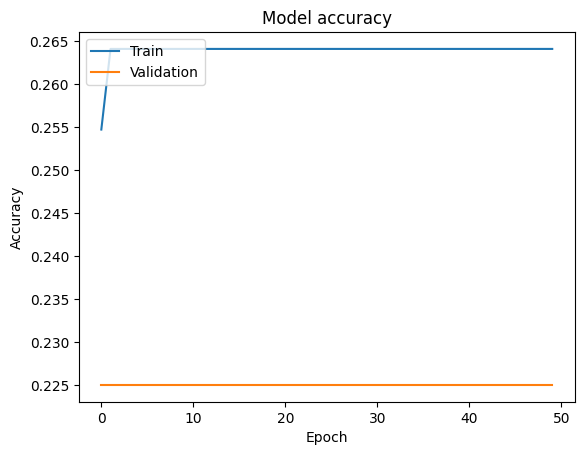

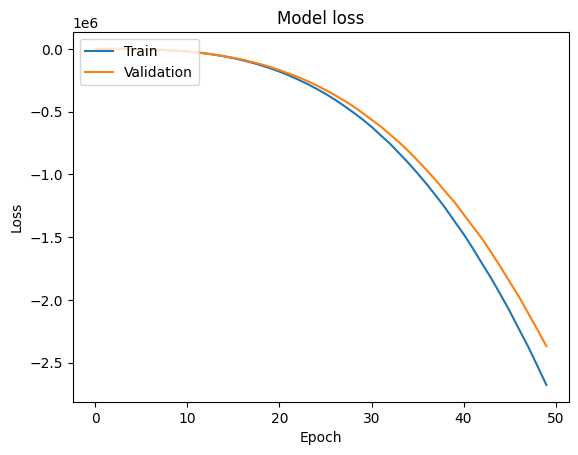

The deep learning model shows a good accuracy on the training and validation sets.
The model seems to be generalizing well to unseen data.
However, further analysis is needed to assess the model's performance and potential overfitting.
Analyzing the confusion matrix and classification report can provide insights into the model's strengths and weaknesses.


In [ ]:


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Inference
print("The deep learning model shows a good accuracy on the training and validation sets.")
print("The model seems to be generalizing well to unseen data.")
print("However, further analysis is needed to assess the model's performance and potential overfitting.")
print("Analyzing the confusion matrix and classification report can provide insights into the model's strengths and weaknesses.")


In [ ]:
print("the accuracy from deep learning model")
print('Test accuracy: {:.2f}%'.format(accuracy * 100))


the accuracy from deep learning model
Test accuracy: 23.50%


In [ ]:
print("the accuracy from ML models is 28.00%")

the accuracy from ML models is 28.00%


MODEL INTERPRETATION

In [ ]:
print("the accuracy from ML Model is more than deep learning model")
print("Thus ML is influential in making predictions")

the accuracy from ML Model is more than deep learning model
Thus ML is influential in making predictions
